# $Homework\, 7 \, (probability \, model)$

By ShineHale(yunsong Yang) U202115980

This part we will deep into the probability model, which is used in everything we encounter, like MCMC, pagerank and so on.

First of all, we need to import the related library we will rely on which is going through all the lab.

In [9]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
%matplotlib inline

## $Experiment \, 1$

Consider the game, there are two guys filp the same coin over and over again. With Head for $P = \frac{1}{2}$, and tail for $P = \frac{1}{2}$, focus on the continuous three times outcomes, we have about eight outcomes $HHH, HHT, HTH, HTT, TTT, TTH, THT, THH$. now both guy have a predict outcome of the eight cases, we assume they are different, calculate the outcomes by using the Monte Carlo simulation method, and have the table for the emprical probability.

we assume $1$ for the head $0$ for tail, so we can have the program as follow:

In [2]:
max_times = 100000
pairs = [[1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0],
         [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1]]
cases = []
for case1 in range(8):
    case = []
    for case2 in range(8):
        tot1, tot2 = 0, 0 
        for _ in range(max_times):
            last3 = []
            while True:
                new_val = random.choice([0, 1])
                last3.append(new_val)

                if len(last3) > 3:
                    last3.pop(0)
                if last3 == pairs[case1]:
                    tot1 += 1
                    break
                elif last3 == pairs[case2]:
                    tot2 += 1
                    break
        case.append(tot1)        
    cases.append(case)
print(np.array(cases))

[[100000  50167  39739  40286  50045  29785  41815  12531]
 [ 50055 100000  66672  66584  69893  49926  62367  25309]
 [ 59991  33501 100000  50140  58321  37304  50351  49919]
 [ 59987  33332  50144 100000  87590  75092  49942  49969]
 [ 50235  30337  41824  12504 100000  49708  40255  39906]
 [ 69890  50137  62321  24831  50181 100000  66625  66497]
 [ 57909  37617  49887  49924  60117  33344 100000  50008]
 [ 87550  74958  50158  50204  60209  33371  50298 100000]]


(0.0, 1.0, 0.0, 1.0)

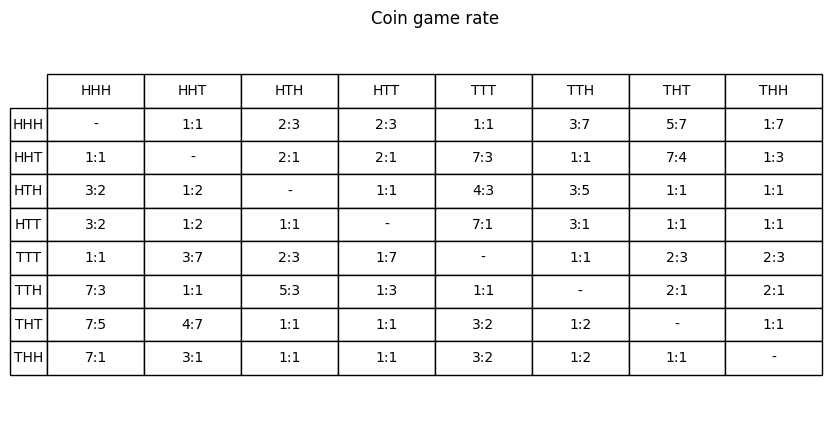

In [3]:
cols = ['HHH', 'HHT', 'HTH', 'HTT', 'TTT', 'TTH', 'THT', 'THH']
rows = cols 

cases = np.array([['-', '1:1', '2:3', '2:3', '1:1', '3:7', '5:7', '1:7'],
                  ['1:1', '-', '2:1', '2:1', '7:3', '1:1', '7:4', '1:3'],
                  ['3:2', '1:2', '-', '1:1', '4:3', '3:5', '1:1', '1:1'],
                  ['3:2', '1:2', '1:1', '-', '7:1', '3:1', '1:1', '1:1'],
                  ['1:1', '3:7', '2:3', '1:7', '-', '1:1', '2:3', '2:3'],
                  ['7:3', '1:1', '5:3', '1:3', '1:1', '-', '2:1', '2:1'],
                  ['7:5', '4:7', '1:1', '1:1', '3:2', '1:2', '-', '1:1'],
                  ['7:1', '3:1', '1:1', '1:1', '3:2', '1:2', '1:1', '-']])

plt.figure(figsize=(10,5))
plt.title('Coin game rate')
tab = plt.table(cellText=cases, 
                colLabels=cols, 
                rowLabels=rows,
                loc='center', 
                cellLoc='center',
                rowLoc='center')
tab.scale(1, 2)
plt.axis('off')

## $Experiment \, 2$

use the random walk to calculate the pagerank value of the following two figures:

![](./question2.png)

we will have the $\lambda = 0.15$ as the Damping coefficient, then consider a new case, we introduce a new matrix $E$, assume a super node, who can go to any other node on the graph, so we have a new matrix.

$$
R = ( \lambda I + \frac{1 - \lambda}{n}E)R

$$
 
For the first graph,we have the matrix as follow.

In [4]:

def pageRank(I, lambd, error):
    N = I.shape[1] 
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    last_v = np.ones((N, 1)) * N
    M_hat = (lambd * I) + (((1 - lambd) / N) * np.ones((N, N)))
    t = 0 
    print('advanced transmit matrix is ')
    print(M_hat)
    
    while np.linalg.norm(v - last_v, 2) > error:
        last_v = v
        v = M_hat.dot(v)
        v = v / np.linalg.norm(v, 1)
        t += 1

    return v, t

In [5]:
I = np.array([[0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0.5, 0, 0],
              [0, 0.5, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0],
              [0, 0.5, 0, 0.5, 0, 0],
              [0, 0, 0, 0, 0, 0]])
lambd = 0.15
print('basic transmit matrix is:')
print(I)
rank_1 , times = pageRank(I, lambd, 1e-8)

basic transmit matrix is:
[[0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]
advanced transmit matrix is 
[[0.14166667 0.14166667 0.29166667 0.14166667 0.14166667 0.14166667]
 [0.14166667 0.14166667 0.14166667 0.21666667 0.14166667 0.14166667]
 [0.14166667 0.21666667 0.14166667 0.14166667 0.14166667 0.29166667]
 [0.14166667 0.14166667 0.14166667 0.14166667 0.29166667 0.14166667]
 [0.14166667 0.21666667 0.14166667 0.21666667 0.14166667 0.14166667]
 [0.14166667 0.14166667 0.14166667 0.14166667 0.14166667 0.14166667]]


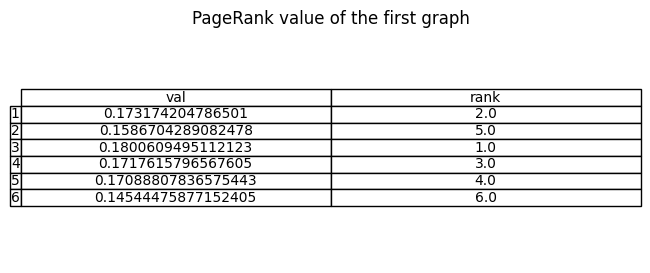

In [6]:
sorted_pg1 = np.argsort(rank_1.T)[0]
pos = np.arange(6)
for i in range(6):
    pos[sorted_pg1[i]] = 6 - i
    
show_cells = np.array([rank_1.T[0], np.int32(pos)]).T
plt.figure(figsize=(8, 3))
plt.title("PageRank value of the first graph")
plt.table(cellText=show_cells,
          colLabels=['val', 'rank'],
          rowLabels=[i + 1 for i in range(6)],
          loc='center', 
          cellLoc='center',
          rowLoc='center')
tab.scale(1, 4)
plt.axis('off')
plt.show()

From the stationary distribution, we can have the pagerank value is $3, 1, 4, 5, 2 ,6$(id from most important to least) for the graph one.

Using the same way for the graph two, we will have

In [7]:
J = np.zeros((8, 8))
J[0, 1], J[0, 2] = 1, 1
J[1, 3], J[1, 4] = 1, 1
J[2, 5], J[2, 6], J[2, 7] = 1, 1, 1
lambd = 0.15
print('basic transmit matrix is:')
print(J)
rank_2 , times = pageRank(J, lambd, 1e-8)

basic transmit matrix is:
[[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
advanced transmit matrix is 
[[0.10625 0.25625 0.25625 0.10625 0.10625 0.10625 0.10625 0.10625]
 [0.10625 0.10625 0.10625 0.25625 0.25625 0.10625 0.10625 0.10625]
 [0.10625 0.10625 0.10625 0.10625 0.10625 0.25625 0.25625 0.25625]
 [0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625]
 [0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625]
 [0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625]
 [0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625]
 [0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625 0.10625]]


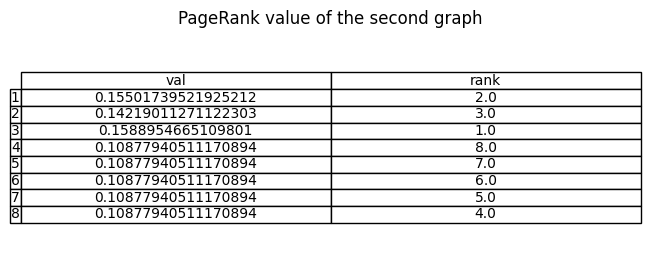

In [8]:
sorted_pg2 = np.argsort(rank_2.T)[0]
pos = np.arange(8)
for i in range(8):
    pos[sorted_pg2[i]] = 8 - i
    
show_cells = np.array([rank_2.T[0], np.int32(pos)]).T
plt.figure(figsize=(8, 3))
plt.title("PageRank value of the second graph")
plt.table(cellText=show_cells,
          colLabels=['val', 'rank'],
          rowLabels=[i + 1 for i in range(8)],
          loc='center', 
          cellLoc='center',
          rowLoc='center')
tab.scale(1, 4)
plt.axis('off')
plt.show()